In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data= pd.read_csv(r'C:\Users\Andrei\Desktop\proiect_viualizare/kepler_data.csv')
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
data.describe

<bound method NDFrame.describe of          kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3     10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9559  10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9561  10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9563  10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fp

In [4]:
# selectăm coloanele de care avem nevoie
data = data[["kepid","kepler_name", "koi_disposition", "koi_period","koi_duration", "koi_prad", "koi_steff", "koi_srad","koi_insol"]]


In [5]:
data = data[data['koi_disposition'] == 'CONFIRMED']
data.head()

,kepid,kepler_name,koi_disposition,koi_period,koi_duration,koi_prad,koi_steff,koi_srad,koi_insol
0,10797460,Kepler-227 b,CONFIRMED,9.488036,2.9575,2.26,5455.0,0.927,93.59
1,10797460,Kepler-227 c,CONFIRMED,54.418383,4.5070,2.83,5455.0,0.927,9.11
4,10854555,Kepler-664 b,CONFIRMED,2.525592,1.6545,2.75,6031.0,1.046,926.16
5,10872983,Kepler-228 d,CONFIRMED,11.094321,4.5945,3.90,6046.0,0.972,114.81
6,10872983,Kepler-228 c,CONFIRMED,4.134435,3.1402,2.77,6046.0,0.972,427.65


Ca si prima filtrare a datelor, am ales sa exclud exoplanetele care nu sunt confirmate.

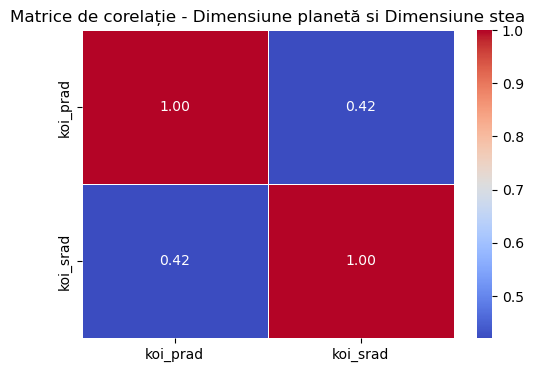

In [6]:
selected_columns = ['koi_prad', 'koi_srad']
selected_data = data[selected_columns]

# calculăm matricea de corelație
correlation_matrix = selected_data.corr()

# afișăm matricea de corelație sub formă de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corelație - Dimensiune planetă si Dimensiune stea')
plt.show()

Am realizat prin functia ".corr()", o matrice pe corelatie, pe care am afisat-o intr-un grafic de tip heatmap. La prima impresie pare ca exista o corelatie intre cele doua variabile, dar nu suficient cat sa confirmam IPOTEZA 1. Pentru a considera un coeficient de corelatie ca fiind sigur, acesta trebuie sa depaseasca pragul de 0,6.

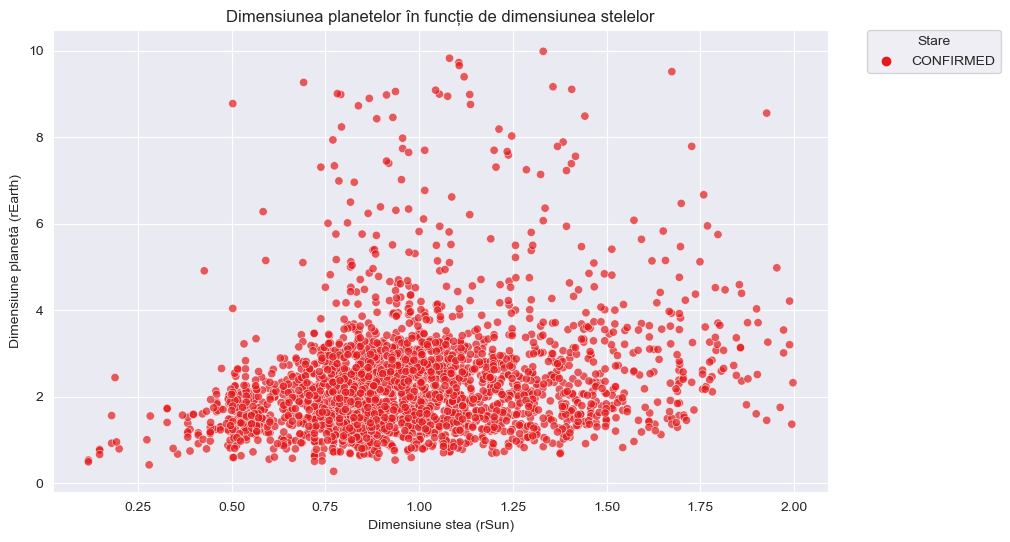

In [7]:
# filtrăm datele
data_1 = data[(data['koi_srad'] < 2) & (data['koi_prad'] < 10)]
data_1 = data_1.dropna(subset=["koi_srad"])

# setăm stilul
sns.set_style("darkgrid")
sns.set_palette("Set1")

# facem un scatter plot pentru a vizualiza relația între dimensiunea stelelor și dimensiunea planetelor
plt.figure(figsize=(10, 6))
sns.scatterplot(x="koi_srad", y="koi_prad", hue="koi_disposition", data=data_1, alpha=0.7)

# adăugăm titlu și etichete de axă
plt.title("Dimensiunea planetelor în funcție de dimensiunea stelelor")
plt.xlabel("Dimensiune stea (rSun)")
plt.ylabel("Dimensiune planetă (rEarth)")

# ajustăm legenda și poziția acesteia
plt.legend(title="Stare", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Am realizat un grafic de tip scatterplot pentru a putea vizualiza dispersia planetelor in functie de cele doua variabile: koi_srad si koi_prad. Dupa prima impresie se confirma partial ipoteza, intrucat reiese ca in functie exista o corelatie intre dimensiunea unei planete si dimensiunea soarelui in jurul caruia aceasta orbiteaza, dimensiunile crescand exponential la amandoua variabilele.

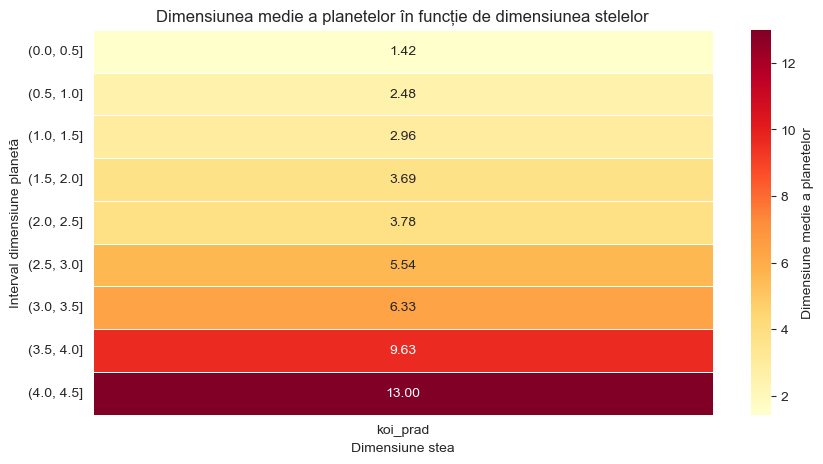

In [8]:

# împărțim dimensiunile stelelor în intervale
bins = [0, 0.5, 1, 1.5, 2, 2.5,3,3.5,4,4.5]
# calculăm dimensiunea medie a planetelor pentru fiecare interval de dimensiune stelară
avg_prad = data.groupby(pd.cut(data["koi_srad"], bins=bins))["koi_prad"].mean()
# setăm stilul 
sns.set_style("white")
# creăm figura
fig, ax = plt.subplots(figsize=(10, 5))
# generăm heatmap-ul
sns.heatmap(avg_prad.to_frame(),
            cmap="YlOrRd",
            linewidths=0.5,
            annot=True,
            fmt=".2f",
            cbar_kws={'label': 'Dimensiune medie a planetelor'},
            ax=ax)
# setăm titlul și etichetele axelor
ax.set_title("Dimensiunea medie a planetelor în funcție de dimensiunea stelelor")
ax.set_xlabel("Dimensiune stea")
ax.set_ylabel("Interval dimensiune planetă")

plt.show()

Dupa ce am mai filtrat din date, eliminandu-le pe cele mari ca fiind considerati giganti gazosi, am afisat datele intr-un grafic de tip heatmap pentru a vedea si mai bine daca intradevar dimensiunea unei planete urmeaza un tipar si este legata de dimensiunea soarelui pe care orbiteaza. Se poate vedea foarte clar ca planetele mici, cu dimensiune cuprinsa intre 0 si 0,5 orbiteaza in jurul unui soare cu dimensiunea medie de 1,42, iar o planeta mare, cu dimensiunea cuprinsa intre 4 si 4,5 orbiteaza in jurul unui soare cu dimensiunea medie de 13.
Astfel, dupa vizualizarea sub mai multe forme ale acestor date, se poate concluziona ca exista intradevar o legatura intre cele doua variabile mentionate mai sus.

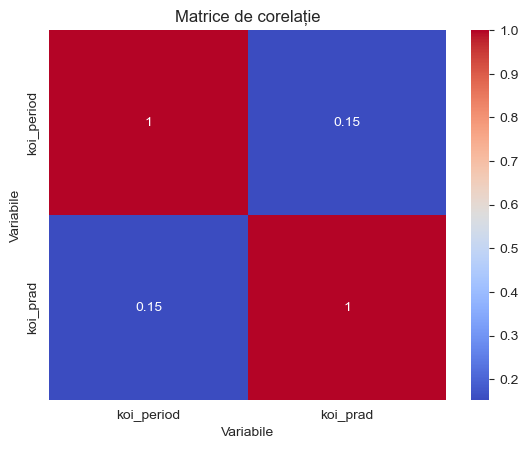

In [9]:
# Filtrăm datele pentru a elimina valorile nule
filtered_data = data.dropna(subset=['koi_period', 'koi_prad'])

# Creăm un dataframe cu cele două variabile
variables = filtered_data[['koi_period', 'koi_prad']]

# Calculăm matricea de corelație
correlation_matrix = variables.corr()

# Creăm graficul de corelație
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Setăm titlul și etichetele axelor
plt.title('Matrice de corelație')
plt.xlabel('Variabile')
plt.ylabel('Variabile')

plt.show()

Ca si anterior am realizat o matrice de corelatie si am vizualizat-o intr-un grafic de tip heatmap. Se poate vedea evident ca rezultatul este unul diferit de asteptari, reiesind ca nu exista corelatie intre cele doua variabile.

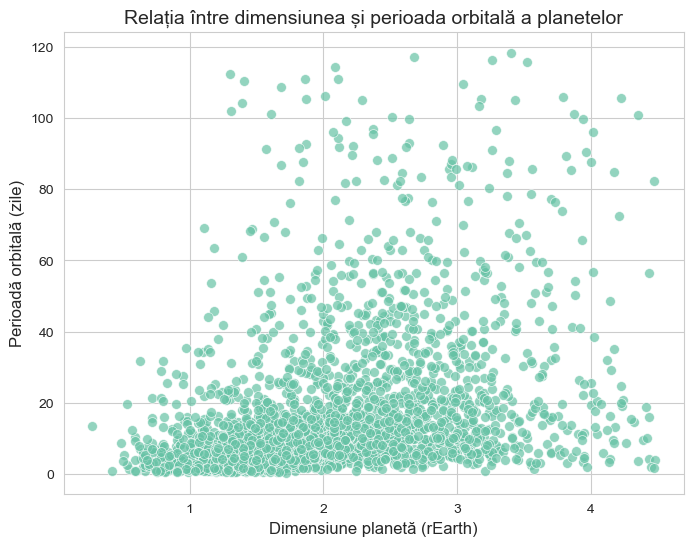

In [10]:
# Filtrăm pentru a elimina datele incomplete
data = data.dropna(subset=['koi_period', 'koi_prad'])
filtered_data = data[(data['koi_prad'] < 4.5) & (data['koi_period'] < 120)]

# setăm stilul
sns.set_style("whitegrid")
sns.set_palette("Set2")

# selectăm valorile de interes
period = filtered_data['koi_period']
radius = filtered_data['koi_prad']

# creăm plotul
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=radius, y=period, alpha=0.7, s=50, ax=ax)

# setăm etichetele axelor și titlul
ax.set_xlabel('Dimensiune planetă (rEarth)', fontsize=12)
ax.set_ylabel('Perioadă orbitală (zile)', fontsize=12)
ax.set_title('Relația între dimensiunea și perioada orbitală a planetelor', fontsize=14)

# modificăm dimensiunile fonturilor pentru marcajele axelor și a grilei
ax.tick_params(axis='both', which='major', labelsize=10)
sns.set(font_scale=1.2)

plt.show()

Am realizat un grafic de tip scatter plot, pentru a vedea dispersia variabilelor in functie de cele doua variabile: koi_praf si koi_period. Cu mici exceptii, majoritatea planetelor par sa urmeze trendul sustinut in ipoteza.

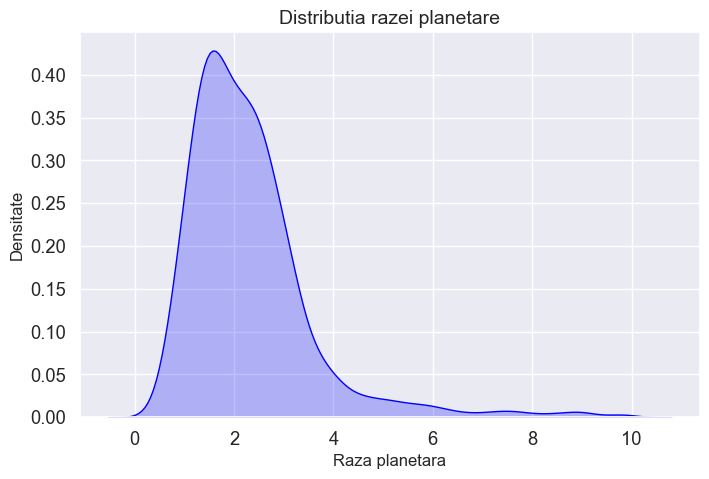

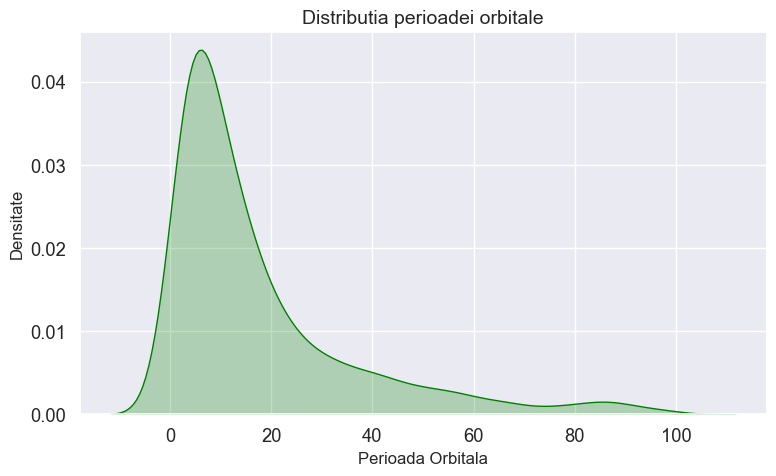

In [11]:
# Selectam valorile koi_prad si koi_period pentru planetele cu dimensiune mai mica sau egala cu 10 unitati si perioada orbitala mai mica sau egala cu 100 de zile
prad = data.loc[(data['koi_prad'] <= 10) & (data['koi_period'] <= 100), 'koi_prad']
per = data.loc[(data['koi_prad'] <= 10) & (data['koi_period'] <= 100), 'koi_period']

# Creem diagrama de densitate pentru koi_prad
plt.figure(figsize=(8, 5))
sns.kdeplot(prad[prad>=0], fill=True, color='blue')
plt.xlabel('Raza planetara', fontsize=12)
plt.ylabel('Densitate', fontsize=12)
plt.title('Distributia razei planetare', fontsize=14)

# Creem diagrama de densitate pentru koi_period
plt.figure(figsize=(8, 5))
sns.kdeplot(per[per>=0], fill=True, color='green')
plt.xlabel('Perioada Orbitala', fontsize=12)
plt.ylabel('Densitate', fontsize=12)
plt.title('Distributia perioadei orbitale', fontsize=14)

plt.tight_layout()
plt.show()

Am vizualizat distributia in parte a celor doua variabile utilizand doua graficuri de tip kernel desity estimate. Se poate observa destul de clar ca acestea urmeaza acelasi tipar. Astfel pot concluziona ca dimensiunea unei planete influenteaza perioada orbitala a acesteia.

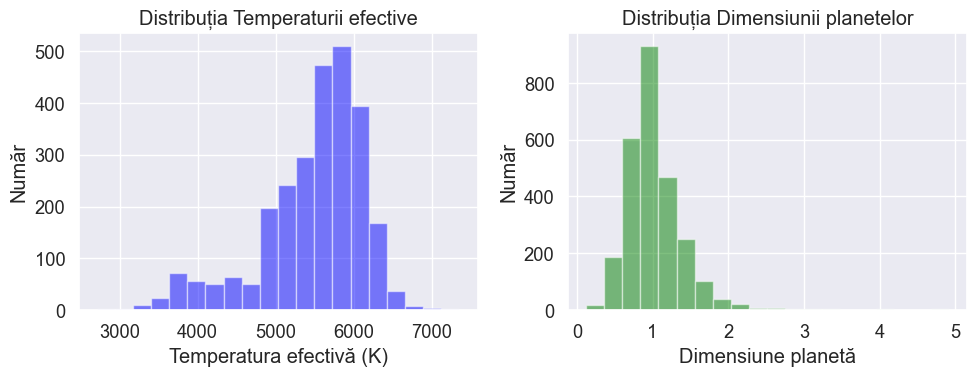

In [12]:
# Creează o figură cu două subgrafice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
filtered_data = data[(data['koi_srad'] <= 5) & (data['koi_steff'] <= 7500)]

# Histograma 1 - Temperatura efectivă
ax1.hist(filtered_data['koi_steff'], bins=20, color='blue', alpha=0.5)
ax1.set_xlabel('Temperatura efectivă (K)')
ax1.set_ylabel('Număr')
ax1.set_title('Distribuția Temperaturii efective')

# Histograma 2 - Dimensiunea planetelor
ax2.hist(filtered_data['koi_srad'], bins=20, color='green', alpha=0.5)
ax2.set_xlabel('Dimensiune planetă')
ax2.set_ylabel('Număr')
ax2.set_title('Distribuția Dimensiunii planetelor')

plt.tight_layout()
plt.show()

Am realizat in prima instanta doua histograme care sa imi arate distributia numarului de planete in raport cu dimensiunea si cu temperatura efectiva a soarelui pe care il orbiteaza.

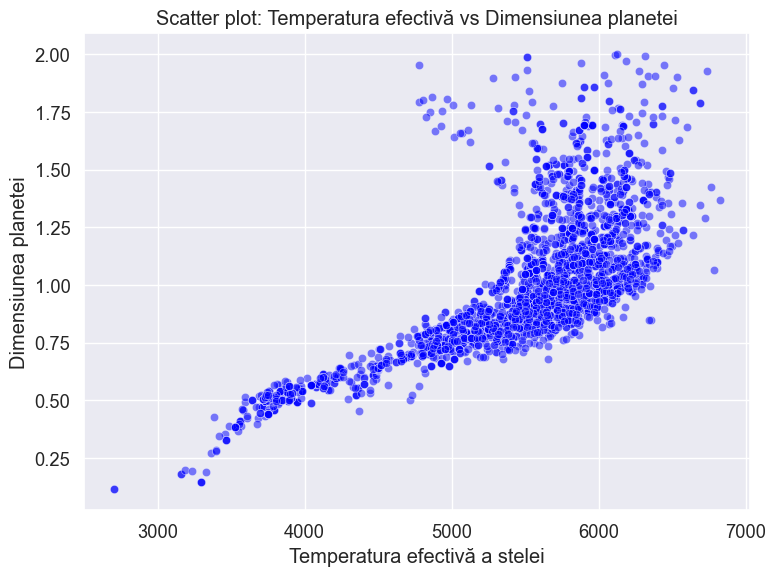

In [13]:
#Filtram datele
filtered_data = data[(data['koi_srad'] <= 2) & (data['koi_steff'] <= 7000)]

#Creem graficul
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['koi_steff'], y=filtered_data['koi_srad'], color='blue', alpha=0.5)

#Setam etichetele
plt.xlabel('Temperatura efectivă a stelei')
plt.ylabel('Dimensiunea planetei')
plt.title('Scatter plot: Temperatura efectivă vs Dimensiunea planetei')

plt.tight_layout()
plt.show()

Am realizat un scatterplot pentru a vedea dispersia planetelor din perspectiva celor doua variabile: dimensiunea soarelui si temperatura efectiva a acestuia. Se poate observa trendul ascendent al ambelor variabile deopotriva. Temperatura soarelui crescand exponential in functie de dimensiunea acestuia.

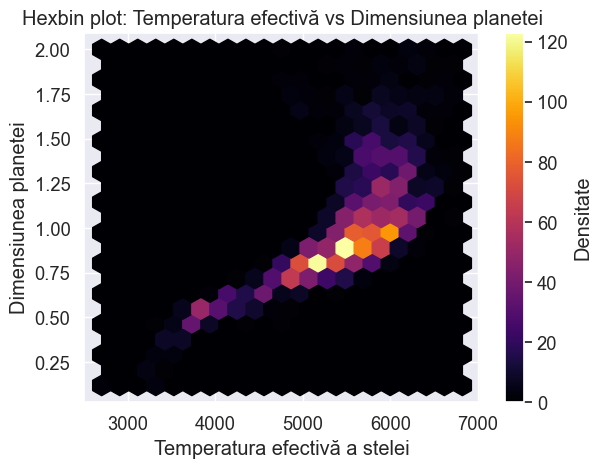

In [14]:
#Filtrez datele
filtered_data = data[(data['koi_srad'] <= 2) & (data['koi_steff'] <= 7000)]
#Creez hexbin plot
plt.hexbin(filtered_data['koi_steff'], filtered_data['koi_srad'], gridsize=20, cmap='inferno')
#Denumesc etichetele
plt.xlabel('Temperatura efectivă a stelei')
plt.ylabel('Dimensiunea planetei')
plt.title('Hexbin plot: Temperatura efectivă vs Dimensiunea planetei')
#Initiez o scala de culoare pentru densitate
plt.colorbar(label='Densitate')

plt.show()


Pe baza la aceleasi date am realizat si un hexbin plot. La care am adaugat densitatea pe o scala de culori. Se pot denota aceleasi rezultate precum in graficul anterior.

In [15]:
def isHabitablePlanet(planet):
    return planet['koi_disposition'] == 'CONFIRMED' \
           and 0.36 < planet['koi_insol'] < 1 \
           and planet['koi_prad'] < 1.6

# Filtrați datele utilizând funcția isHabitablePlanet
habitable_data = data[data.apply(isHabitablePlanet, axis=1)]

In [16]:
habitable_data.head(10)

,kepid,kepler_name,koi_disposition,koi_period,koi_duration,koi_prad,koi_steff,koi_srad,koi_insol
2285,11768142,Kepler-1652 b,CONFIRMED,38.097072,4.3070,1.58,3554.0,0.398,0.81
2660,3642335,Kepler-1410 b,CONFIRMED,60.866097,4.3970,1.39,3808.0,0.522,0.84
4636,11497958,Kepler-296 f,CONFIRMED,63.335472,3.6510,1.18,3526.0,0.383,0.39
4766,4138008,Kepler-442 b,CONFIRMED,112.303136,5.8690,1.30,4401.0,0.595,0.79
6016,11497958,Kepler-296 e,CONFIRMED,34.142051,2.9450,1.06,3526.0,0.383,0.89
6020,6444896,Kepler-1649 b,CONFIRMED,8.689108,1.1627,0.49,2703.0,0.118,0.47
6463,9002278,Kepler-62 f,CONFIRMED,267.282521,7.7880,1.43,4926.0,0.662,0.44
9014,8311864,Kepler-452 b,CONFIRMED,384.847556,9.9690,1.09,5579.0,0.798,0.56


Dupa filtrarea planetelor locuibile se poate observa ca s-a gasit un numar de 8 planete locuibile.

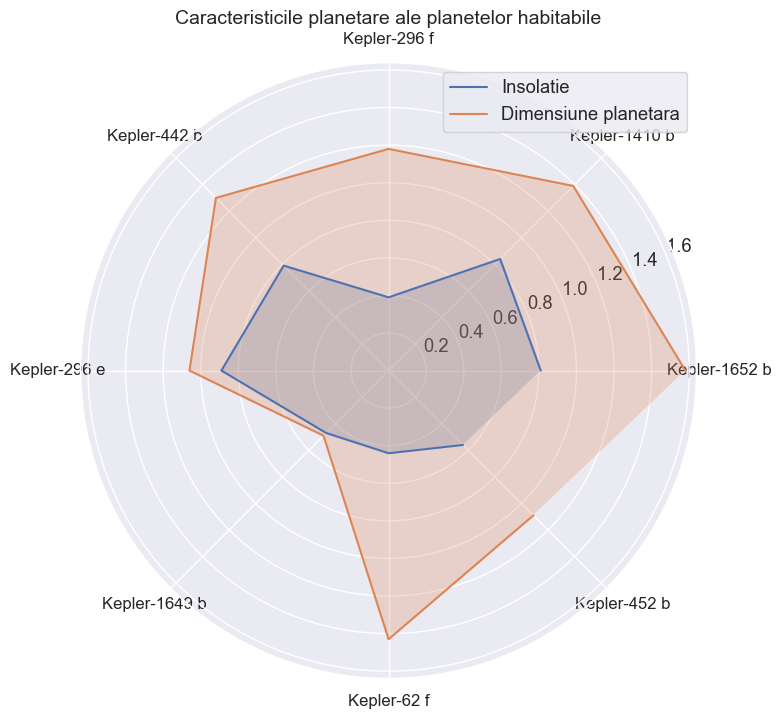

In [17]:
#separam in dateframes valorile tinta
planet_names = habitable_data['kepler_name'].tolist()
insolation = habitable_data['koi_insol'].tolist()
planet_radius = habitable_data['koi_prad'].tolist()
# Setarea valorilor pentru axa unghiulară
theta = np.linspace(0, 2*np.pi, len(planet_names), endpoint=False)
# Crearea graficului radar
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
# Adăugarea datelor pe grafic|
ax.plot(theta, insolation, label='Insolatie')
ax.fill(theta, insolation, alpha=0.25)
ax.plot(theta, planet_radius, label='Dimensiune planetara')
ax.fill(theta, planet_radius, alpha=0.25)
# Setarea etichetelor pentru axe și titlului
ax.set_xticks(theta)
ax.set_xticklabels(planet_names, fontsize=12)
ax.set_title('Caracteristicile planetare ale planetelor habitabile', fontsize=14)
ax.legend()
plt.show()

Am unit datele relevante pentru planetele locuibile intr-un grafic de tip radar pentru a putea observa mai bine variabilele ce le denota habitabilitatea.

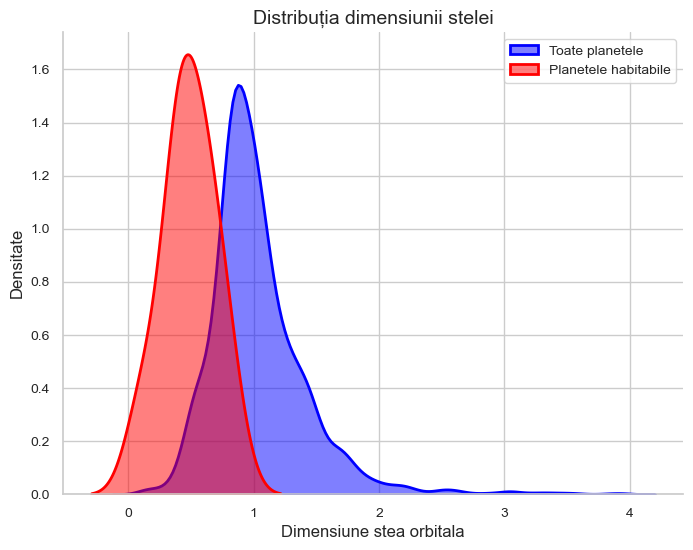

In [18]:
#Filtrare date si initializare dataframes
filtered_data = data[(data['koi_srad'] < 4)]
koi_srad_all = filtered_data['koi_srad']
koi_srad_habitable = habitable_data['koi_srad']

# Stilizare aspect grafic
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Creare grafic KDE cu transparență redusă
sns.kdeplot(koi_srad_all, color='blue', fill=True, label='Toate planetele', linewidth=2, alpha=0.5)
sns.kdeplot(koi_srad_habitable, color='red', fill=True, label='Planetele habitabile', linewidth=2, alpha=0.5)

# Adăugare titlu și etichete pentru axele x și y
plt.title('Distribuția dimensiunii stelei', fontsize=14)
plt.xlabel('Dimensiune stea orbitala', fontsize=12)
plt.ylabel('Densitate', fontsize=12)

# Stilizare legendă și margine dreaptă
plt.legend(fontsize=10, loc='upper right')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Am realizat o matrice de tip KDE, in care am surprins distributia dimensiunii stelei orbitale a planetelor habitabile, in paralel cu cea a tuturor planetelor. In urma analizarii graficului deducem ca planetele habitabile au preponderend stele cu dimensiune medie in jurul lui 0.5, pe cand media celorlalte planete se situeaza in jur de 1.

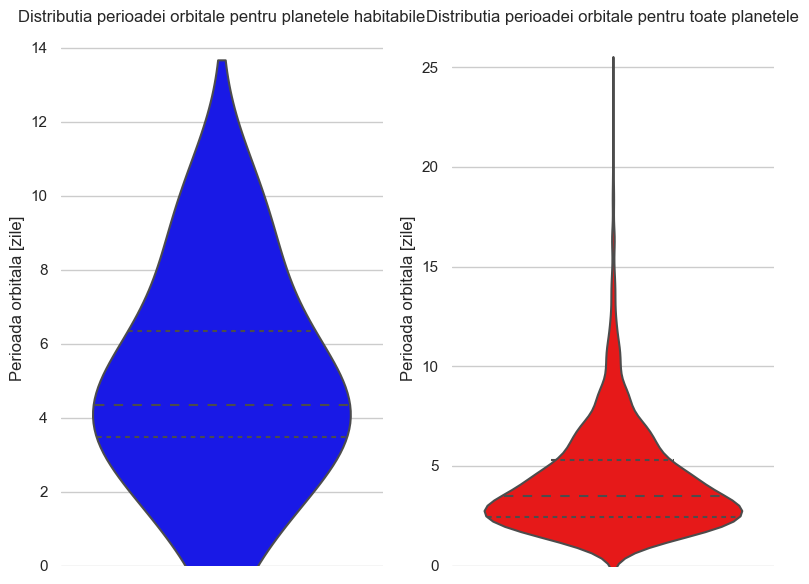

In [19]:
# Datele pentru planetele habitabile
habitable_period = habitable_data['koi_duration']

# Datele pentru toate planetele
all_period = data['koi_duration']

# Stilizare aspect grafic
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Violin plot pentru planetele habitabile
plt.subplot(1, 2, 1)
sns.violinplot(y=habitable_period, color='blue', inner='quartile', linewidth=1.5, saturation=0.8)
plt.ylim(0, None)
plt.ylabel('Perioada orbitala [zile]')
plt.title('Distributia perioadei orbitale pentru planetele habitabile')

# Violin plot pentru toate planetele
plt.subplot(1, 2, 2)
sns.violinplot(y=all_period, color='red', inner='quartile', linewidth=1.5, saturation=0.8)
plt.ylim(0, None)
plt.ylabel('Perioada orbitala [zile]')
plt.title('Distributia perioadei orbitale pentru toate planetele')

# Ajustarea layout-ului și eliminarea marginilor inutile
plt.tight_layout()
sns.despine(trim=True, left=True)
plt.show()

Am realizat doua grafice de tip violin in aceasi figura, prima ne expune distributia perioadei orbitale in zile a planetelor habitabile, iar a doua ne expune distributia perioadei pentru toate planetele. In urma analizarii graficului, se poate concluziona ca plaja perioadei orbitale la planetele locuibila este mai mica decat la totalitatea planetelor.

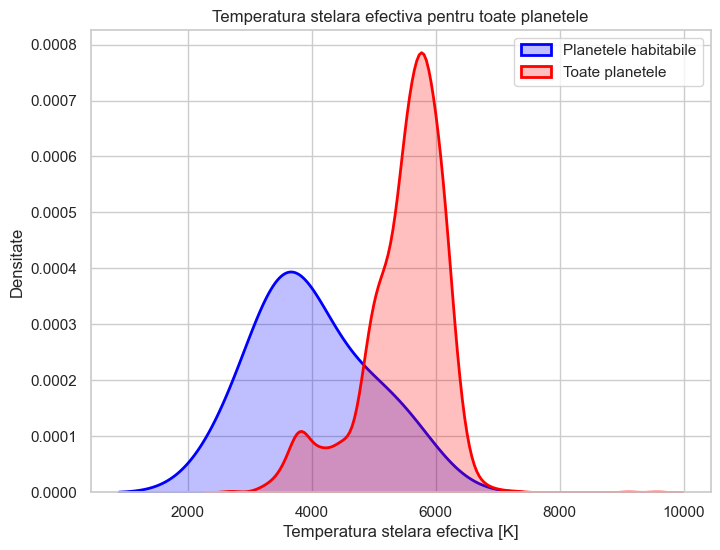

In [20]:
# Datele pentru planetele habitabile
habitable_steff = habitable_data['koi_steff']

# Datele pentru celelalte planete
other_steff = data['koi_steff']

# Stilizare aspect grafic
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# KDE pentru planetele habitabile
sns.kdeplot(habitable_steff, color='blue',fill=True, label='Planetele habitabile', linewidth=2)
plt.xlabel('Temperatura stelara efectiva [K]')
plt.ylabel('Densitate')
plt.title('Temperatura stelara efectiva pentru planetele habitabile')

# KDE pentru celelalte planete
sns.kdeplot(other_steff, color='red',fill=True, label='Toate planetele', linewidth=2)
plt.xlabel('Temperatura stelara efectiva [K]')
plt.ylabel('Densitate')
plt.title('Temperatura stelara efectiva pentru toate planetele')
plt.legend()
plt.show()


Am realizat inca unde grafic de tip KDE, in care am surprins distributia temperaturii stelare efective a planetelor habitabile, in paralel cu cea a tuturor planetelor. In urma analizarii graficului putem observa ca planetele habitabile au stele cu temperatura efectiva de 4000 grade K, iar privind la toate planetele acestea orbiteaza stele cu temperatura efectiva de 6000 grade K.